In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [50]:
mnist = tf.keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


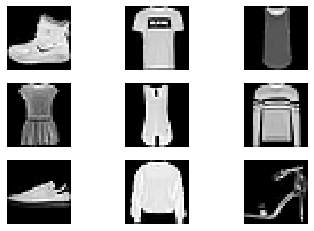

In [28]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train_full[i], cmap='gray')
    plt.axis('off')
plt.show()

In [29]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [138]:
from functools import partial

dense_layer = partial(tf.keras.layers.Dense, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    dense_layer(3200),
    dense_layer(1600),
    dense_layer(800),
    dense_layer(400),
    dense_layer(200),
    dense_layer(100),
    dense_layer(10,activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])

In [139]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

In [140]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
16896/55000 [========>.....................] - ETA: 2:56 - loss: 1.1247 - accuracy: 0.7737

KeyboardInterrupt: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


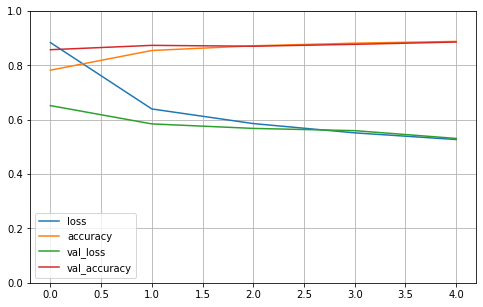

In [141]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('rates.eps')

In [142]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[794   4  38  45   9   1  92   0  17   0]
 [  1 959  10  21   7   0   0   0   2   0]
 [  7   1 847   8 119   0  15   0   3   0]
 [ 38  22  29 838  54   0  15   0   4   0]
 [  0   0 184  23 786   0   4   0   3   0]
 [  0   0   0   1   0 850   0  88   4  57]
 [170   3 270  38 256   0 242   0  21   0]
 [  0   0   0   0   0   8   0 889   1 102]
 [  1   1  33   7   9   1   3   5 939   1]
 [  0   0   0   0   0   2   0  25   1 972]]


In [143]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[62.67274308738708, 0.8116]

(55000,)

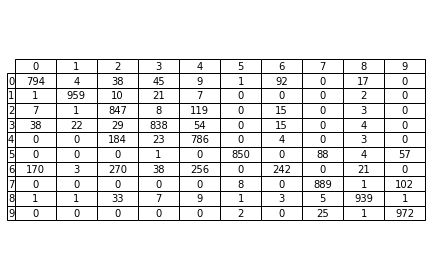

In [144]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('fcnn_conf_mat.eps')